<a href="https://colab.research.google.com/github/mmckellar25/Se-assigment2/blob/main/Unique_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

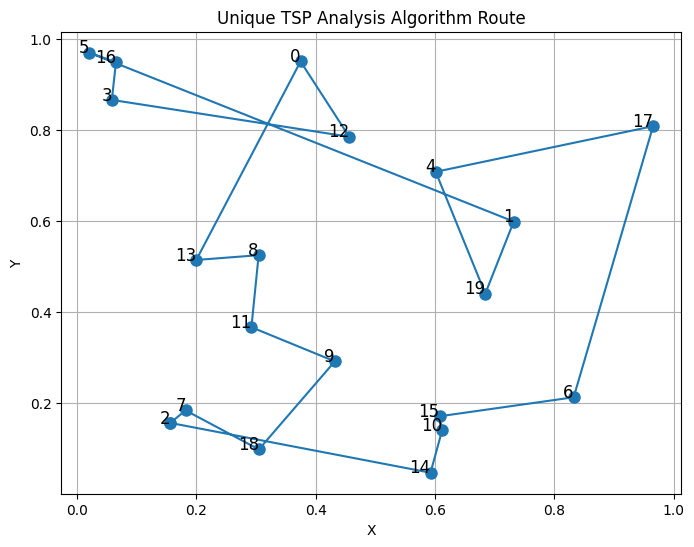

Total route distance: 5.0772


In [3]:
# Unique TSP Analysis Algorithm

# ========================
# Import Required Libraries
# ========================
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random

# ============================
# Generate Random Cities (Nodes)
# ============================
def generate_cities(num_cities, seed=42):
    np.random.seed(seed)
    return np.random.rand(num_cities, 2)

cities = generate_cities(20)

# =========================
# Distance Calculation
# =========================
def calculate_distance(city1, city2):
    return np.linalg.norm(city1 - city2)

def distance_matrix(cities):
    n = len(cities)
    dist = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            d = calculate_distance(cities[i], cities[j])
            dist[i][j] = d
            dist[j][i] = d
    return dist

dist = distance_matrix(cities)

# ==========================================
# Heuristic: Nearest Neighbor with Clustering
# ==========================================
def nearest_neighbor(dist_matrix, start=0):
    n = len(dist_matrix)
    visited = [start]
    current = start
    while len(visited) < n:
        next_city = np.argmin([
            dist_matrix[current][j] if j not in visited else np.inf
            for j in range(n)
        ])
        visited.append(next_city)
        current = next_city
    return visited

# Quick Clustering Heuristic
def cluster_cities(cities, num_clusters=4):
    from sklearn.cluster import KMeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(cities)
    clusters = [[] for _ in range(num_clusters)]
    for idx, label in enumerate(kmeans.labels_):
        clusters[label].append(idx)
    return clusters

# ============================
# Build Route with Clustering
# ============================
def build_clustered_route(cities, dist_matrix, num_clusters=4):
    clusters = cluster_cities(cities, num_clusters)
    final_route = []
    for cluster in clusters:
        if cluster:
            submatrix = dist_matrix[np.ix_(cluster, cluster)]
            subpath = nearest_neighbor(submatrix, start=0)
            mapped_subpath = [cluster[i] for i in subpath]
            final_route.extend(mapped_subpath)
    return final_route

route = build_clustered_route(cities, dist)

# ============================
# Plot the Final TSP Route
# ============================
def plot_route(cities, route):
    route_cities = np.append(route, route[0])  # return to start
    plt.figure(figsize=(8,6))
    plt.plot(cities[route_cities, 0], cities[route_cities, 1], 'o-', markersize=8)
    for idx, (x, y) in enumerate(cities):
        plt.text(x, y, str(idx), fontsize=12, ha='right')
    plt.title('Unique TSP Analysis Algorithm Route')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

plot_route(cities, route)

# ============================
# Calculate Total Distance
# ============================
def total_route_distance(route, dist_matrix):
    distance = 0
    for i in range(len(route)):
        distance += dist_matrix[route[i]][route[(i+1) % len(route)]]
    return distance

print(f"Total route distance: {total_route_distance(route, dist):.4f}")
